# Analyze_e1e

Example for the MAXM05 course

(Sverker Werin)

In [0]:
!pip install accelerator-toolbox # only for Google Colab

import at
import numpy as np
import matplotlib.pyplot as plt

Define the lattice elements.

In [0]:
# Straight Section definitions
D      =    at.elements.Drift('D', 1.5  );

# Quadrupoles 
QF     =    at.elements.Quadrupole('QF'  , 0.2, 0.750000);

Define the lattice.

In [0]:
L = [ D ]
L1 = 5*L
lattice =  [D,D,D, QF]+ L1 
print(lattice)

[Drift('D', 1.5), Drift('D', 1.5), Drift('D', 1.5), Quadrupole('QF', 0.2, 0.75), Drift('D', 1.5), Drift('D', 1.5), Drift('D', 1.5), Drift('D', 1.5), Drift('D', 1.5)]


Define a particle X [x, xp, y ,yp, dp, s]

In [0]:
i=1000 # number of particles
X0 = np.zeros((6, i))
X0[0, :] = np.random.normal(0,1,i)*1e-3  # particle offset in x
X0[1, :] = np.random.normal(0,1,i)*0.1e-3  # particle offset in xp

X0[2, :] = np.random.normal(0,1,i)*1e-3  # particle offset in y
X0[3, :] = np.random.normal(0,1,i)*0.1e-3  # particle offset in yp

Plot the real space at the entrance

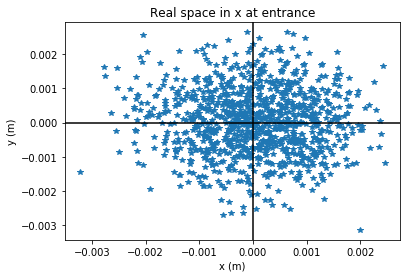

In [0]:
plt.plot(X0[0,:],X0[2,:],'*')
axes = plt.gca()
axes.axhline(y=0,color='k')
axes.axvline(x=0, color='k')
axes.set_xlabel('x (m)')
axes.set_ylabel('y (m)')
axes.set_title('Real space in x at entrance')
plt.show()


Track through the lattice

In [0]:
# Find reference points for output. One for each element.
length = np.size(lattice)
refpts = np.r_[0:length + 1]

In [0]:
# Track the particle in X0 through the lattice.
X_out = at.lattice_pass(lattice, X0, nturns=1,refpts=refpts)

Get the longitudinal position of each element exit.

In [0]:
s = at.lattice.get_s_pos(lattice)

Plot the phase space at the origin

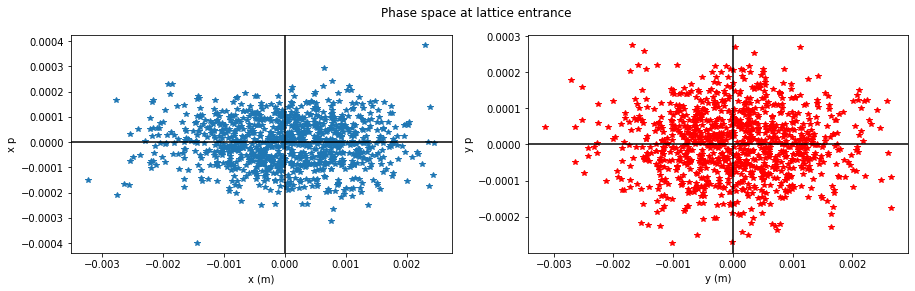

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.suptitle('Phase space at lattice entrance')
ax1.plot(X_out[0,:,0,0],X_out[1,:,0,0],'*')
ax1.axhline(y=0,color='k')
ax1.axvline(x=0, color='k')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('x p')


ax2.plot(X_out[2,:,0,0],X_out[3,:,0,0],'*r')
ax2.axhline(y=0,color='k')
ax2.axvline(x=0, color='k')
ax2.set_xlabel('y (m)')
ax2.set_ylabel('y p')
plt.show()

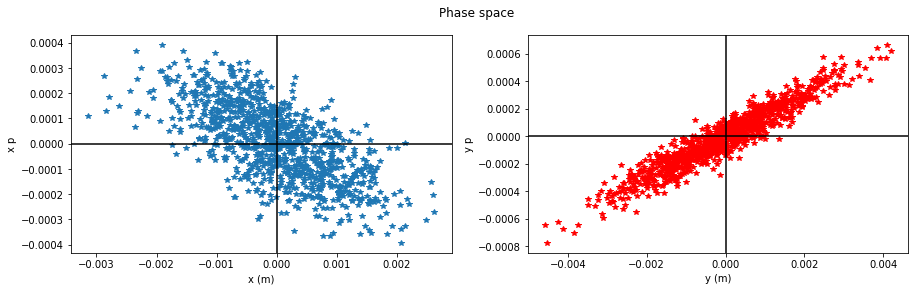

In [0]:
element=5
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
fig.suptitle('Phase space')
ax1.plot(X_out[0,:,element,0],X_out[1,:,element,0],'*')
ax1.axhline(y=0,color='k')
ax1.axvline(x=0, color='k')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('x p')

ax2.plot(X_out[2,:,element,0],X_out[3,:,element,0],'*r')
ax2.axhline(y=0,color='k')
ax2.axvline(x=0, color='k')
ax2.set_xlabel('y (m)')
ax2.set_ylabel('y p')
plt.show()